In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import os

file_path = "/content/drive/MyDrive/Game Day Challenge 2025/Dataset 2025/Clean_data2025(1).csv"
if os.path.exists(file_path):
    print("File found!")
else:
    print("File not found. Check the path.")

File found!


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import yfinance as yf

In [77]:
df = pd.read_csv(file_path)
df.head()

<ipython-input-77-4537a753a3fc>:1: DtypeWarning: Columns (33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,hashtags,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions,popular_brand,brand_from_mentions
0,2025-02-10T03:16:57.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789225308409951,everyone,['1888789225308409951'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789225308409951,206743570,...,NaN,NaN,"['@patriotslatam', '@TomBrady']",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"['sólo', 'hay', 'uno', 'como']",0.000000,Neutral,True,Dunkin',[]
1,2025-02-10T03:16:49.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789188876894329,everyone,['1888789188876894329'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789188876894329,282285390,...,NaN,NaN,"['@patriotslatam', '@TomBrady']",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"['sólo', 'hay', 'uno', 'como']",0.000000,Neutral,True,Dunkin',[]
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,everyone,['1888789186284503124'],en,NaN,False,1888789186284503124,246885450,...,['#SuperBowl'],['🐐'],['@TomBrady'],THE ONLY GOAT. 🐐 @TomBrady #SuperBowl,[],0.000000,Neutral,True,Dunkin',[]
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,NaN,['@TomBrady'],I love you @TomBrady,['love'],0.500000,Positive,True,Dunkin',[]
4,2025-02-10T03:16:45.000Z,RT @billboard: Ben Affleck Brings Back the Dun...,1888789174926319942,everyone,['1888789174926319942'],en,"[{'type': 'retweeted', 'id': '1888737296708472...",False,1888789174926319942,30152016,...,NaN,NaN,['@billboard'],RT @billboard: Ben Affleck Brings Back the Dun...,"['ben', 'affleck', 'brings', 'back', 'dunkings...",0.166667,Positive,True,Dunkin',[]


In [76]:
print(df.columns)


Index(['created_at', 'text', 'conversation_id', 'reply_settings',
       'edit_history_tweet_ids', 'lang', 'referenced_tweets',
       'possibly_sensitive', 'id', 'author_id', 'entities.annotations',
       'entities.mentions', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'public_metrics.bookmark_count',
       'public_metrics.impression_count', 'edit_controls.edits_remaining',
       'edit_controls.is_edit_eligible', 'edit_controls.editable_until',
       'entities.urls', 'attachments.media_keys', 'entities.hashtags',
       'in_reply_to_user_id', 'attachments.media_source_tweet_id',
       'entities.cashtags', 'location', 'username', 'name', 'brand',
       'geo.place_id', 'attachments.poll_ids', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates', 'hashtags',
       'emojis', 'mentions', 'clean_text', 'tokens', 'sentiment',
       'sentiment_category', 'has_me

<ipython-input-78-233b31f193c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sensitive_proportion.index, y=sensitive_proportion.values, palette=["blue", "red"])


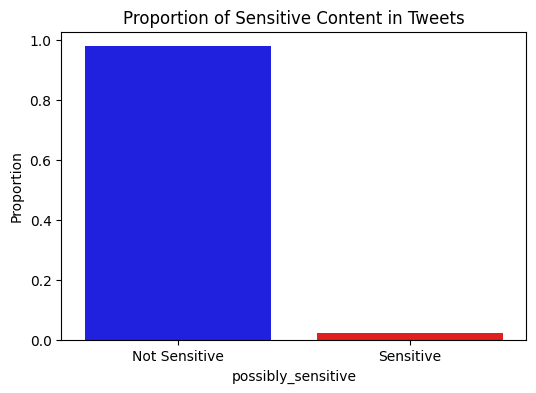

Saved proportion of sensitive content data to Proportion of Sensitive Content in Tweets.csv


In [78]:
# Calculate proportion
sensitive_proportion = df['possibly_sensitive'].value_counts(normalize=True)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=sensitive_proportion.index, y=sensitive_proportion.values, palette=["blue", "red"])
plt.xticks([0, 1], ["Not Sensitive", "Sensitive"])
plt.ylabel("Proportion")
plt.title("Proportion of Sensitive Content in Tweets")
plt.show()

# Convert sensitive_proportion to DataFrame
sensitive_proportion_df = pd.DataFrame(sensitive_proportion).reset_index() # Convert to DataFrame
sensitive_proportion_df.columns = ['possibly_sensitive', 'proportion'] # Rename columns

# Save the tweet activity data to a CSV file
output_file_path = "Proportion of Sensitive Content in Tweets.csv"
sensitive_proportion_df.to_csv(output_file_path, index=False)

print(f"Saved proportion of sensitive content data to {output_file_path}")


In [79]:
import pandas as pd
import re

# Load US state names and abbreviations
us_states = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV",
    "Wisconsin": "WI", "Wyoming": "WY"
}

# Create regex pattern for full state names and abbreviations
state_pattern = r'\b(' + '|'.join(us_states.keys()) + r'|' + '|'.join(us_states.values()) + r')\b'

# Sample DataFrame with location column
#data = {"location": ["New York, USA", "California, USA", "London, UK", "TX, USA", "Florida, Miami", "Ontario, Canada"]}
#df = pd.DataFrame(data)

df = pd.read_csv(file_path)  # Load the full dataset



# Function to extract U.S. state from location
def extract_state(location):
    match = re.search(state_pattern, location, re.IGNORECASE)
    if match:
        return match.group(0)  # Return the matched state name or abbreviation
    return None  # Return None if no state is found

# Apply function to extract states
df["state"] = df["location"].apply(lambda x: extract_state(str(x)))

# Drop rows where state is None (Non-U.S. locations)
df = df.dropna(subset=["state"]).reset_index(drop=True)

# Show the result
print(df)



<ipython-input-79-4e736f35f357>:28: DtypeWarning: Columns (33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Load the full dataset


                     created_at  \
0      2025-02-10T03:16:46.000Z   
1      2025-02-10T03:16:43.000Z   
2      2025-02-10T03:16:16.000Z   
3      2025-02-10T03:16:15.000Z   
4      2025-02-10T03:16:07.000Z   
...                         ...   
18258  2025-02-10T02:41:12.000Z   
18259  2025-02-10T02:41:04.000Z   
18260  2025-02-10T02:39:48.000Z   
18261  2025-02-10T02:39:01.000Z   
18262  2025-02-10T02:39:01.000Z   

                                                    text      conversation_id  \
0                                   I love you @TomBrady  1888789179074793761   
1      Not everyone can be this \n@TomBrady you fucki...  1888789164579328429   
2      RT @SkapAttack: This was never feasibly a conv...  1888789050087112993   
3      RT @NFL: From winning Super Bowls to calling t...  1888789048694567026   
4      @TomBrady certainly isn't the GOAT of announci...  1888789014406111361   
...                                                  ...                  ...   
18258  @samm

In [81]:
# Convert state abbreviations to full names
def extract_state(location):
    match = re.search(state_pattern, location, re.IGNORECASE)
    if match:
        state = match.group(0)
        return us_states.get(state, state)  # Convert to full name if abbreviation
    return None


In [82]:
df["state"] = df["location"].apply(lambda x: extract_state(str(x)))
df.head()

,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions,popular_brand,brand_from_mentions,state
0,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,['@TomBrady'],I love you @TomBrady,['love'],0.500000,Positive,True,Dunkin',[],MI
1,2025-02-10T03:16:43.000Z,Not everyone can be this \n@TomBrady you fucki...,1888789164579328429,everyone,['1888789164579328429'],en,"[{'type': 'quoted', 'id': '1888780677295853663'}]",False,1888789164579328429,4668028074,...,['♥️'],['@TomBrady'],Not everyone can be this @TomBrady you fucking...,"['everyone', 'fucking', 'legend']",-0.600000,Negative,True,Dunkin',[],CT
2,2025-02-10T03:16:16.000Z,RT @SkapAttack: This was never feasibly a conv...,1888789050087112993,everyone,['1888789050087112993'],en,"[{'type': 'retweeted', 'id': '1888783291689697...",False,1888789050087112993,1741674871245991937,...,NaN,['@SkapAttack'],RT @SkapAttack: This was never feasibly a conv...,"['never', 'feasibly', 'realistically', 'never'...",-0.800000,Negative,True,Dunkin',[],FL
3,2025-02-10T03:16:15.000Z,RT @NFL: From winning Super Bowls to calling t...,1888789048694567026,everyone,['1888789048694567026'],en,"[{'type': 'retweeted', 'id': '1888714658607251...",True,1888789048694567026,1033129742709481473,...,"['🐐', '📺', '📱']","['@NFL', '@TomBrady']",RT @NFL: From winning Super Bowls to calling t...,"['winning', 'super', 'bowls', 'calling', 'et',...",0.416667,Positive,True,Dunkin',[],NC
4,2025-02-10T03:16:07.000Z,@TomBrady certainly isn't the GOAT of announci...,1888789014406111361,everyone,['1888789014406111361'],en,NaN,False,1888789014406111361,15042255,...,NaN,['@TomBrady'],@TomBrady certainly isn't the GOAT of announci...,"['certainly', 'goat', 'announcing']",0.214286,Positive,True,Dunkin',[],CA


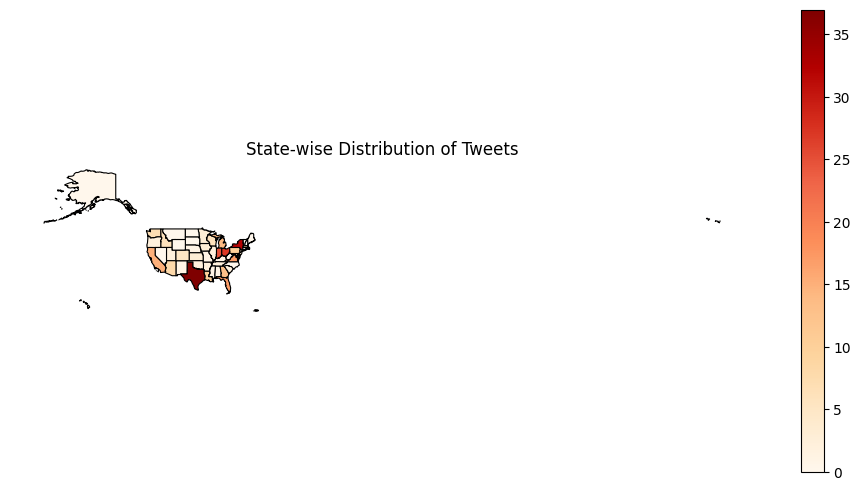

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load US states shapefile (replace this path with the correct local path if downloaded)
us_states_url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip"
us_states = gpd.read_file(us_states_url)

# Convert state names to title case to match dataset
df['state'] = df['state'].str.title()

# Count tweets per state
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'tweet_count']

# Merge with the US states shapefile
state_geo = us_states.merge(state_counts, left_on="NAME", right_on="state", how="left").fillna(0)

# Plot state-wise tweet distribution
fig, ax = plt.subplots(figsize=(12, 6))
state_geo.plot(column="tweet_count", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
plt.title("State-wise Distribution of Tweets")
plt.axis("off")  # Hide axes
plt.show()

df['state'] = df['state'].astype(str).str.title()  # Ensure 'state' column is string type

# Count tweets per state
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'tweet_count']

# Save to CSV
state_counts.to_csv("state_wise_tweet_counts.csv", index=False)

In [84]:
!pip install yfinance


In [85]:
import yfinance as yf


In [86]:
print(df.columns)  # Check available column names


Index(['created_at', 'text', 'conversation_id', 'reply_settings',
       'edit_history_tweet_ids', 'lang', 'referenced_tweets',
       'possibly_sensitive', 'id', 'author_id', 'entities.annotations',
       'entities.mentions', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'public_metrics.bookmark_count',
       'public_metrics.impression_count', 'edit_controls.edits_remaining',
       'edit_controls.is_edit_eligible', 'edit_controls.editable_until',
       'entities.urls', 'attachments.media_keys', 'entities.hashtags',
       'in_reply_to_user_id', 'attachments.media_source_tweet_id',
       'entities.cashtags', 'location', 'username', 'name', 'brand',
       'geo.place_id', 'attachments.poll_ids', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates', 'hashtags',
       'emojis', 'mentions', 'clean_text', 'tokens', 'sentiment',
       'sentiment_category', 'has_me

In [87]:
import pandas as pd

# Example DataFrame
#data = {'created_at': ['2024-02-01 12:34:56', '2024-02-02 08:22:10', 'Invalid Date', '2024-02-03 15:45:30']}
df = pd.read_csv(file_path)

# Convert 'created_at' column to datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')  # 'coerce' replaces invalid values with NaT

# Check result
print(df)
print(df.dtypes)  # Ensure 'created_at' is now datetime64[ns]


<ipython-input-87-84f5ef0189f8>:5: DtypeWarning: Columns (33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                     created_at  \
0     2025-02-10 03:16:57+00:00   
1     2025-02-10 03:16:49+00:00   
2     2025-02-10 03:16:48+00:00   
3     2025-02-10 03:16:46+00:00   
4     2025-02-10 03:16:45+00:00   
...                         ...   
69531 2025-02-10 02:37:52+00:00   
69532 2025-02-10 02:37:47+00:00   
69533 2025-02-10 02:37:47+00:00   
69534 2025-02-10 02:37:34+00:00   
69535 2025-02-10 02:37:19+00:00   

                                                    text      conversation_id  \
0      RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...  1888789225308409951   
1      RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...  1888789188876894329   
2      THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...  1888789186284503124   
3                                   I love you @TomBrady  1888789179074793761   
4      RT @billboard: Ben Affleck Brings Back the Dun...  1888789174926319942   
...                                                  ...                  ...   
69531  レッドブル

In [88]:
df = df.dropna(subset=['created_at']).reset_index(drop=True)


In [89]:
df['date_only'] = df['created_at'].dt.date  # Extract only the date part
df['hour'] = df['created_at'].dt.hour  # Extract hour
df['day_of_week'] = df['created_at'].dt.day_name()  # Get day name


In [90]:
#print(df.head())  # Display first few rows of the updated DataFrame
print(df[['created_at', 'date_only', 'hour', 'day_of_week']].head())



                 created_at   date_only  hour day_of_week
0 2025-02-10 03:16:57+00:00  2025-02-10     3      Monday
1 2025-02-10 03:16:49+00:00  2025-02-10     3      Monday
2 2025-02-10 03:16:48+00:00  2025-02-10     3      Monday
3 2025-02-10 03:16:46+00:00  2025-02-10     3      Monday
4 2025-02-10 03:16:45+00:00  2025-02-10     3      Monday


In [91]:
print(df.columns)

Index(['created_at', 'text', 'conversation_id', 'reply_settings',
       'edit_history_tweet_ids', 'lang', 'referenced_tweets',
       'possibly_sensitive', 'id', 'author_id', 'entities.annotations',
       'entities.mentions', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'public_metrics.bookmark_count',
       'public_metrics.impression_count', 'edit_controls.edits_remaining',
       'edit_controls.is_edit_eligible', 'edit_controls.editable_until',
       'entities.urls', 'attachments.media_keys', 'entities.hashtags',
       'in_reply_to_user_id', 'attachments.media_source_tweet_id',
       'entities.cashtags', 'location', 'username', 'name', 'brand',
       'geo.place_id', 'attachments.poll_ids', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates', 'hashtags',
       'emojis', 'mentions', 'clean_text', 'tokens', 'sentiment',
       'sentiment_category', 'has_me

In [95]:
print(df['brand'].unique())  # Shows all unique brands


["Dunkin'" 'Novartis' 'MSC Cruises' 'Little Caesars' 'Homes.com' 'NFL'
 'Meta' 'Tubi' 'Taco Bell' 'Doritos' 'Mountain Dew' 'Cirkul' 'Jeep'
 'Stella Artois' 'Coffee mate' 'Pringles' 'Angel Soft' "Reese's"
 'Duracell' 'Coors Light' 'Uber Eats' 'Dove' 'Booking.com' 'Ram' 'HexClad'
 'Budweiser' "Hellmann's" 'Disney' 'Bud Light' 'Ritz' 'Squarespace'
 'Hims & Hers' 'Nerds' 'Michelob Ultra' 'Skechers' 'TurboTax' 'FanDuel'
 'DoorDash' 'Lays' 'NerdWallet' 'Häagen-Dazs' 'Poppi' 'Instacart'
 'WeatherTech' 'Rocket Mortgage' 'Liquid Death' 'Bosch'
 "Totino's Pizza Rolls" 'Nerdwallet' 'GoDaddy' 'Fetch' 'Busch Light'
 'Nike' 'Google' 'hegetsus' 'openai' 'FCAS' 'Oikos' 'RedBull']


In [96]:
print(df['brand'].value_counts())  # Shows brand counts


brand
Homes.com               5979
Disney                  5972
NFL                     5971
TurboTax                5970
Dunkin'                 5966
Google                  4576
Bud Light               3799
hegetsus                3585
Lays                    2797
Michelob Ultra          2499
Tubi                    2487
Nike                    2189
Doritos                 1996
Hims & Hers             1695
DoorDash                1691
Little Caesars          1200
Instacart                899
Fetch                    897
openai                   798
FanDuel                  699
Meta                     698
Coffee mate              599
Taco Bell                499
Jeep                     400
Budweiser                400
Novartis                 400
Ram                      399
Poppi                    398
Dove                     398
Squarespace              200
Ritz                     200
MSC Cruises              200
Stella Artois            200
RedBull                  199
Nerds   

In [92]:
!pip install tiingo


In [118]:
# List of unique brands in the dataset
brands = df['brand'].unique()


# Dictionary to store stock symbols for each brand (modify as needed)
brand_ticker_mapping = {
    "Nike": "NKE",
    "Google": "GOOGL",
    "Meta": "META",
    "Uber Eats": "UBER",
    "Disney": "DIS",
    "Budweiser": "BUD",
    "DoorDash": "DASH",
    "Novartis": "NVS",
    "Michelob Ultra": "BUD",
    "Mountain Dew": "PEP",
    "Taco Bell": "YUM",
    "Doritos": "PEP",
    "Jeep": "STLA",
    "Pringles": "K",
    "Duracell": "BRK-B",
    "Coors Light": "TAP",
    "Dove": "UL",
    "Skechers": "SKX",
    "Instacart": "CART",
    "Google": "GOOGL",
    "Booking.com": "BKNG",
    "Ram": "STLA",
    "HexClad": None,  # Private Company
    "Bud Light": "BUD",
    "Ritz": "MDLZ",
    "Squarespace": "SQSP",
    "Hims & Hers": "HIMS",
    "Nerds": "MDLZ",
    "TurboTax": "INTU",
    "FanDuel": "FLUT.L",  # Parent Company: Flutter Entertainment (London Stock Exchange)
    "Lays": "PEP",
    "NerdWallet": "NRDS",
    "Häagen-Dazs": "NSRGY",  # Nestlé
    "Poppi": None,  # Private Company
    "WeatherTech": None,  # Private Company
    "Rocket Mortgage": "RKT",
    "Liquid Death": None,  # Private Company
    "Bosch": None,  # Private (Robert Bosch GmbH)
    "Totino's Pizza Rolls": "GIS",  # General Mills
    "Nerdwallet": "NRDS",
    "GoDaddy": "GDDY",
    "Fetch": None,  # Private Company
    "Busch Light": "BUD",
    "Dunkin'": None,  # Private (Acquired by Inspire Brands)
    "NFL": None,  # Not publicly traded
    "Tubi": None,  # Owned by Fox (FOXA)
    "Cirkul": None,  # Private Company
    "Stella Artois": "BUD",
    "Coffee mate": "NSRGY",  # Nestlé
    "Angel Soft": "GP",  # Georgia-Pacific (Owned by Koch Industries, private)
    "Reese's": "HSY",  # Hershey's
    "Hims & Hers": "HIMS",
    "FCAS": None,  # No publicly traded company
    "Oikos": "NSRGY",  # Nestlé (Parent Company of Danone)
    "RedBull": None,  # Private Company
    "Hellmann's": "UL",  # Unilever
    "hegetsus": None,  # Non-Profit Organization
    "openai": None,  # Private Company
}

In [129]:
import yfinance as yf
import pandas as pd
import time

# ✅ Ensure 'date_only' is in datetime format
df['date_only'] = pd.to_datetime(df['date_only'], errors='coerce')

# ✅ Store results
stock_changes = []

In [131]:
# ✅ Function to get stock data with delays
def fetch_stock_data_safely(ticker, start_date, end_date):
    for attempt in range(3):  # ✅ Try up to 3 times
        try:
            print(f"📥 Fetching data for {ticker} from {start_date} to {end_date}...")
            stock = yf.download(ticker, start=start_date, end=end_date)
            time.sleep(10)  # ✅ Wait 10 seconds to avoid rate limiting
            return stock
        except yf.YFRateLimitError:
            wait_time = 30 * (attempt + 1)
            print(f"⚠️ Rate limit hit! Retrying in {wait_time} seconds...")
            time.sleep(wait_time)  # ✅ Exponential backoff
        except Exception as e:
            print(f"⚠️ Error fetching {ticker}: {e}")
            return pd.DataFrame()
    return pd.DataFrame()  # ✅ Return empty DataFrame if all retries fail

# ✅ Get all unique tickers
tickers = df['ticker'].dropna().unique().tolist()


In [132]:
# ✅ Get global min/max dates
global_min_date = df['date_only'].min() - pd.Timedelta(days=2)
global_max_date = df['date_only'].max()

# ✅ Convert to strings
start_date = global_min_date.strftime('%Y-%m-%d')
end_date = global_max_date.strftime('%Y-%m-%d')


In [133]:
# ✅ Fetch stock data ONE TICKER AT A TIME (to avoid rate limiting)
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = fetch_stock_data_safely(ticker, start_date, end_date)

# ✅ Process each brand
for brand in df['brand'].unique():
    ticker = df[df['brand'] == brand]['ticker'].iloc[0]

    if pd.isna(ticker) or ticker not in stock_data or stock_data[ticker].empty:
        print(f"⚠️ No stock data found for {brand} ({ticker}). Skipping...")
        continue

    # ✅ Find tweet date range
    min_date = df[df['brand'] == brand]['date_only'].min()
    max_date = df[df['brand'] == brand]['date_only'].max()
    before_date = min_date - pd.Timedelta(days=2)

    # ✅ Get stock price before tweet
    stock = stock_data[ticker].reset_index()
    stock['date'] = stock['Date'].dt.date
    price_before = stock.loc[stock['date'] == before_date.date(), 'Close'].values

    if len(price_before) == 0:
        print(f"⚠️ No stock price for {brand} ({ticker}) before {min_date}. Skipping...")
        continue
    price_before = price_before[0]

    # ✅ Loop through each day after the tweet
    for i in range((max_date - before_date).days + 1):
        check_date = before_date + pd.Timedelta(days=i)
        price_after = stock.loc[stock['date'] == check_date.date(), 'Close'].values

        if len(price_after) > 0:
            price_after = price_after[0]
            price_change = ((price_after - price_before) / price_before) * 100

            stock_changes.append({
                "brand": brand,
                "ticker": ticker,
                "min_tweet_date": min_date.date(),
                "comparison_date": check_date.date(),
                "stock_price_before": price_before,
                "stock_price_after": price_after,
                "percentage_change": round(price_change, 2)
            })


📥 Fetching data for NVS from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for META from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['META']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for YUM from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['YUM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for PEP from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for STLA from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STLA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for BUD from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BUD']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for NSRGY from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NSRGY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for K from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['K']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for GP from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GP']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for HSY from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HSY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for BRK-B from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK-B']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for TAP from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TAP']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for UBER from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['UBER']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for UL from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['UL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for BKNG from 2025-02-07 to 2025-02-10...


ERROR:yfinance:Failed to get ticker 'BKNG' reason: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKNG']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


📥 Fetching data for DIS from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DIS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for MDLZ from 2025-02-07 to 2025-02-10...


ERROR:yfinance:Failed to get ticker 'MDLZ' reason: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MDLZ']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


📥 Fetching data for SQSP from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SQSP']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for HIMS from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HIMS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for SKX from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SKX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for INTU from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INTU']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for FLUT.L from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FLUT.L']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for DASH from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DASH']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for NRDS from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NRDS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for CART from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CART']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for RKT from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RKT']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for GIS from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GIS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for GDDY from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GDDY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


📥 Fetching data for NKE from 2025-02-07 to 2025-02-10...


ERROR:yfinance:Failed to get ticker 'NKE' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NKE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


📥 Fetching data for GOOGL from 2025-02-07 to 2025-02-10...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOGL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


⚠️ No stock data found for Novartis (NVS). Skipping...
⚠️ No stock data found for Meta (META). Skipping...
⚠️ No stock data found for Taco Bell (YUM). Skipping...
⚠️ No stock data found for Doritos (PEP). Skipping...
⚠️ No stock data found for Mountain Dew (PEP). Skipping...
⚠️ No stock data found for Jeep (STLA). Skipping...
⚠️ No stock data found for Stella Artois (BUD). Skipping...
⚠️ No stock data found for Coffee mate (NSRGY). Skipping...
⚠️ No stock data found for Pringles (K). Skipping...
⚠️ No stock data found for Angel Soft (GP). Skipping...
⚠️ No stock data found for Reese's (HSY). Skipping...
⚠️ No stock data found for Duracell (BRK-B). Skipping...
⚠️ No stock data found for Coors Light (TAP). Skipping...
⚠️ No stock data found for Uber Eats (UBER). Skipping...
⚠️ No stock data found for Dove (UL). Skipping...
⚠️ No stock data found for Booking.com (BKNG). Skipping...
⚠️ No stock data found for Ram (STLA). Skipping...
⚠️ No stock data found for Budweiser (BUD). Skipping...
⚠